# Web scraping and lyrics analysis

#### The main focus of this notebook was the web scraping of songs from https://www.azlyrics.com/ . The bands chosen for this exercise are Depeche Mode and U2, both in their prime era in the late 1980's. The songs scraped are from the bands's top albums, respectively "Violator" (1990) and "The Joshua Tree" (1987). 
#### The html structure of azlyrics is not as complex as, for eg., Genius, so for this purpose we want to use libraries that facilitate the scraping of this page. To grab the data for this web page we use the requests library and the BeautifulSoup library for extracting just the text, which then is put into a dataframe with three columns: Artist, Songs, Lyrics. 

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [16]:
artists = ["Depeche Mode", "U2"]

# add Depeche Mode links
dm_songs = ["https://www.azlyrics.com/lyrics/depechemode/personaljesus.html", "https://www.azlyrics.com/lyrics/depechemode/worldinmyeyes.html", "https://www.azlyrics.com/lyrics/depechemode/enjoythesilence.html", "https://www.azlyrics.com/lyrics/depechemode/halo.html","https://www.azlyrics.com/lyrics/depechemode/waitingforthenight.html", "https://www.azlyrics.com/lyrics/depechemode/policyoftruth.html", "https://www.azlyrics.com/lyrics/depechemode/bluedress.html", "https://www.azlyrics.com/lyrics/depechemode/clean.html"]

#get the body of the page containing the desired songs
dm_responses = [requests.get(link).text for link in dm_songs]
beautiful_dm_responses = [BeautifulSoup(response, "html.parser") for response in dm_responses]

#select the title and the lyrics of each song
dm_titles = [doc.select("div b")[1].text.replace('"',"") for doc in beautiful_dm_responses]
dm_lyrics = [doc.select("div.row div div")[7].text for doc in beautiful_dm_responses]


dm_df = pd.DataFrame({"Artist": "Depeche Mode", "Songs": dm_titles, "Lyrics": dm_lyrics})
dm_df

,Artist,Songs,Lyrics
0,Depeche Mode,Personal Jesus,\n\r\nReach out and touch faith\n\nYour own pe...
1,Depeche Mode,World In My Eyes,\n\r\nLet me take you on a trip\nAround the wo...
2,Depeche Mode,Enjoy The Silence,\n\r\nWords like violence break the silence\nC...
3,Depeche Mode,Halo,\n\r\nYou wear guilt\nLike shackles on your fe...
4,Depeche Mode,Waiting For The Night,\n\r\nI'm waiting for the night to fall\nI kno...
5,Depeche Mode,Policy Of Truth,\n\r\nYou had something to hide\nShould have h...
6,Depeche Mode,Blue Dress,\n\r\nPut it on\nAnd don't say a word\nPut it ...
7,Depeche Mode,Clean,"\n\r\nClean, the cleanest I've been\nAn end to..."


In [3]:
u2_songs = ["https://www.azlyrics.com/lyrics/u2band/withorwithoutyou.html", "https://www.azlyrics.com/lyrics/u2band/istillhaventfoundwhatimlookingfor.html", "https://www.azlyrics.com/lyrics/u2band/wherethestreetshavenoname.html", "https://www.azlyrics.com/lyrics/u2band/bulletthebluesky.html", "https://www.azlyrics.com/lyrics/u2band/runningtostandstill.html", "https://www.azlyrics.com/lyrics/u2band/redhillminingtown.html", "https://www.azlyrics.com/lyrics/u2band/ingodscountry.html", "https://www.azlyrics.com/lyrics/u2band/tripthroughyourwires.html"]

u2_responses = [requests.get(link).text for link in u2_songs]
beautiful_u2_responses = [BeautifulSoup(response, "html.parser") for response in u2_responses]

u2_titles = [doc.select("div b")[1].text.replace('"',"") for doc in beautiful_u2_responses]
u2_lyrics = [doc.select("div.row div div")[7].text for doc in beautiful_u2_responses]


u2_df = pd.DataFrame({"Artist": "U2", "Songs": u2_titles, "Lyrics": u2_lyrics})
u2_df

,Artist,Songs,Lyrics
0,U2,With Or Without You,\n\r\nSee the stone set in your eyes\nSee the ...
1,U2,I Still Haven't Found What I'm Looking For,\n\r\nI have climbed the highest mountains\nI ...
2,U2,Where The Streets Have No Name,"\n\r\nI wanna run, I want to hide\nI wanna tea..."
3,U2,Bullet The Blue Sky,\n\r\nIn the howlin' wind\nComes a stingin' ra...
4,U2,Running To Stand Still,\n\r\nAnd so she woke up\nWoke up from where s...
5,U2,Red Hill Mining Town,\n\r\nFrom father to son\nThe blood runs thin\...
6,U2,In God's Country,"\n\r\nDesert sky, dream beneath the desert sky..."
7,U2,Trip Through Your Wires,"\n\r\nIn the distance, she saw me comin' round..."


#### NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP. Because our data contains a human-readable text, preprocessing is much needed. By tokenizing the lyrics, we split the texts by words, which later on will be easier to analyse. 

In [19]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
words = []

#tokenize lyrics by word
for lyrics in dm_df['Lyrics']:
    lyric = word_tokenize(lyrics)
    words.append(lyric)
    

dm_df['tok_by_word'] = words
dm_df


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/catalinacruceanu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Artist,Songs,Lyrics,tok_by_word
0,Depeche Mode,Personal Jesus,\n\r\nReach out and touch faith\n\nYour own pe...,"[Reach, out, and, touch, faith, Your, own, per..."
1,Depeche Mode,World In My Eyes,\n\r\nLet me take you on a trip\nAround the wo...,"[Let, me, take, you, on, a, trip, Around, the,..."
2,Depeche Mode,Enjoy The Silence,\n\r\nWords like violence break the silence\nC...,"[Words, like, violence, break, the, silence, C..."
3,Depeche Mode,Halo,\n\r\nYou wear guilt\nLike shackles on your fe...,"[You, wear, guilt, Like, shackles, on, your, f..."
4,Depeche Mode,Waiting For The Night,\n\r\nI'm waiting for the night to fall\nI kno...,"[I, 'm, waiting, for, the, night, to, fall, I,..."
5,Depeche Mode,Policy Of Truth,\n\r\nYou had something to hide\nShould have h...,"[You, had, something, to, hide, Should, have, ..."
6,Depeche Mode,Blue Dress,\n\r\nPut it on\nAnd don't say a word\nPut it ...,"[Put, it, on, And, do, n't, say, a, word, Put,..."
7,Depeche Mode,Clean,"\n\r\nClean, the cleanest I've been\nAn end to...","[Clean, ,, the, cleanest, I, 've, been, An, en..."


In [4]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
words = []

#tokenize lyrics by word
for lyrics in u2_df['Lyrics']:
    lyric = word_tokenize(lyrics)
    words.append(lyric)
    

u2_df['tok_by_word'] = words
u2_df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/catalinacruceanu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Artist,Songs,Lyrics,tok_by_word
0,U2,With Or Without You,\n\r\nSee the stone set in your eyes\nSee the ...,"[See, the, stone, set, in, your, eyes, See, th..."
1,U2,I Still Haven't Found What I'm Looking For,\n\r\nI have climbed the highest mountains\nI ...,"[I, have, climbed, the, highest, mountains, I,..."
2,U2,Where The Streets Have No Name,"\n\r\nI wanna run, I want to hide\nI wanna tea...","[I, wan, na, run, ,, I, want, to, hide, I, wan..."
3,U2,Bullet The Blue Sky,\n\r\nIn the howlin' wind\nComes a stingin' ra...,"[In, the, howlin, ', wind, Comes, a, stingin, ..."
4,U2,Running To Stand Still,\n\r\nAnd so she woke up\nWoke up from where s...,"[And, so, she, woke, up, Woke, up, from, where..."
5,U2,Red Hill Mining Town,\n\r\nFrom father to son\nThe blood runs thin\...,"[From, father, to, son, The, blood, runs, thin..."
6,U2,In God's Country,"\n\r\nDesert sky, dream beneath the desert sky...","[Desert, sky, ,, dream, beneath, the, desert, ..."
7,U2,Trip Through Your Wires,"\n\r\nIn the distance, she saw me comin' round...","[In, the, distance, ,, she, saw, me, comin, ',..."


#### Stop words are words that we want to ignore, so we filter them out of your text when we’re processing it. 

In [20]:
#removing the stopwords
from nltk.corpus import stopwords
nltk.download("stopwords") 
stop_words = set(stopwords.words("english"))
no_stopwords = {song:[] for song in dm_df['Songs']}
n = len(dm_df)
for i in range(n):
    good_words = []
    for word in dm_df['tok_by_word'][i]:
        if word.casefold() not in stop_words:
            good_words.append(word)
        
    no_stopwords[dm_df['Songs'][i]] = good_words
    

dm_df['no_stopwords'] = no_stopwords.items()
dm_df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catalinacruceanu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Artist,Songs,Lyrics,tok_by_word,no_stopwords
0,Depeche Mode,Personal Jesus,\n\r\nReach out and touch faith\n\nYour own pe...,"[Reach, out, and, touch, faith, Your, own, per...","(Personal Jesus, [Reach, touch, faith, persona..."
1,Depeche Mode,World In My Eyes,\n\r\nLet me take you on a trip\nAround the wo...,"[Let, me, take, you, on, a, trip, Around, the,...","(World In My Eyes, [Let, take, trip, Around, w..."
2,Depeche Mode,Enjoy The Silence,\n\r\nWords like violence break the silence\nC...,"[Words, like, violence, break, the, silence, C...","(Enjoy The Silence, [Words, like, violence, br..."
3,Depeche Mode,Halo,\n\r\nYou wear guilt\nLike shackles on your fe...,"[You, wear, guilt, Like, shackles, on, your, f...","(Halo, [wear, guilt, Like, shackles, feet, Lik..."
4,Depeche Mode,Waiting For The Night,\n\r\nI'm waiting for the night to fall\nI kno...,"[I, 'm, waiting, for, the, night, to, fall, I,...","(Waiting For The Night, ['m, waiting, night, f..."
5,Depeche Mode,Policy Of Truth,\n\r\nYou had something to hide\nShould have h...,"[You, had, something, to, hide, Should, have, ...","(Policy Of Truth, [something, hide, hidden, ,,..."
6,Depeche Mode,Blue Dress,\n\r\nPut it on\nAnd don't say a word\nPut it ...,"[Put, it, on, And, do, n't, say, a, word, Put,...","(Blue Dress, [Put, n't, say, word, Put, one, p..."
7,Depeche Mode,Clean,"\n\r\nClean, the cleanest I've been\nAn end to...","[Clean, ,, the, cleanest, I, 've, been, An, en...","(Clean, [Clean, ,, cleanest, 've, end, tears, ..."


In [5]:
from nltk.corpus import stopwords
nltk.download("stopwords") 
stop_words = set(stopwords.words("english"))
no_stopwords = {song:[] for song in u2_df['Songs']}
n = len(u2_df)
for i in range(n):
    good_words = []
    for word in u2_df['tok_by_word'][i]:
        if word.casefold() not in stop_words:
            good_words.append(word)
        
    no_stopwords[u2_df['Songs'][i]] = good_words
    

u2_df['no_stopwords'] = no_stopwords.items()
u2_df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catalinacruceanu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Artist,Songs,Lyrics,tok_by_word,no_stopwords
0,U2,With Or Without You,\n\r\nSee the stone set in your eyes\nSee the ...,"[See, the, stone, set, in, your, eyes, See, th...","(With Or Without You, [See, stone, set, eyes, ..."
1,U2,I Still Haven't Found What I'm Looking For,\n\r\nI have climbed the highest mountains\nI ...,"[I, have, climbed, the, highest, mountains, I,...","(I Still Haven't Found What I'm Looking For, [..."
2,U2,Where The Streets Have No Name,"\n\r\nI wanna run, I want to hide\nI wanna tea...","[I, wan, na, run, ,, I, want, to, hide, I, wan...","(Where The Streets Have No Name, [wan, na, run..."
3,U2,Bullet The Blue Sky,\n\r\nIn the howlin' wind\nComes a stingin' ra...,"[In, the, howlin, ', wind, Comes, a, stingin, ...","(Bullet The Blue Sky, [howlin, ', wind, Comes,..."
4,U2,Running To Stand Still,\n\r\nAnd so she woke up\nWoke up from where s...,"[And, so, she, woke, up, Woke, up, from, where...","(Running To Stand Still, [woke, Woke, lyin, ',..."
5,U2,Red Hill Mining Town,\n\r\nFrom father to son\nThe blood runs thin\...,"[From, father, to, son, The, blood, runs, thin...","(Red Hill Mining Town, [father, son, blood, ru..."
6,U2,In God's Country,"\n\r\nDesert sky, dream beneath the desert sky...","[Desert, sky, ,, dream, beneath, the, desert, ...","(In God's Country, [Desert, sky, ,, dream, ben..."
7,U2,Trip Through Your Wires,"\n\r\nIn the distance, she saw me comin' round...","[In, the, distance, ,, she, saw, me, comin, ',...","(Trip Through Your Wires, [distance, ,, saw, c..."


#### Lemmatizing reduces words to their core meaning, but it will give a complete English word that makes sense on its own. 

In [21]:
#add the lemmatized form of the words in our DataFrame
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
lemmatized = {song:[] for song in dm_df['Songs']}
for i in range(n):
    lemmatized_words = []
    for word in dm_df['tok_by_word'][i]:
            lemmatized_words.append(lemmatizer.lemmatize(word))
        
    lemmatized[dm_df['Songs'][i]] = lemmatized_words

dm_df['lemmatized_words'] = lemmatized.items()
dm_df

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/catalinacruceanu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Artist,Songs,Lyrics,tok_by_word,no_stopwords,lemmatized_words
0,Depeche Mode,Personal Jesus,\n\r\nReach out and touch faith\n\nYour own pe...,"[Reach, out, and, touch, faith, Your, own, per...","(Personal Jesus, [Reach, touch, faith, persona...","(Personal Jesus, [Reach, out, and, touch, fait..."
1,Depeche Mode,World In My Eyes,\n\r\nLet me take you on a trip\nAround the wo...,"[Let, me, take, you, on, a, trip, Around, the,...","(World In My Eyes, [Let, take, trip, Around, w...","(World In My Eyes, [Let, me, take, you, on, a,..."
2,Depeche Mode,Enjoy The Silence,\n\r\nWords like violence break the silence\nC...,"[Words, like, violence, break, the, silence, C...","(Enjoy The Silence, [Words, like, violence, br...","(Enjoy The Silence, [Words, like, violence, br..."
3,Depeche Mode,Halo,\n\r\nYou wear guilt\nLike shackles on your fe...,"[You, wear, guilt, Like, shackles, on, your, f...","(Halo, [wear, guilt, Like, shackles, feet, Lik...","(Halo, [You, wear, guilt, Like, shackle, on, y..."
4,Depeche Mode,Waiting For The Night,\n\r\nI'm waiting for the night to fall\nI kno...,"[I, 'm, waiting, for, the, night, to, fall, I,...","(Waiting For The Night, ['m, waiting, night, f...","(Waiting For The Night, [I, 'm, waiting, for, ..."
5,Depeche Mode,Policy Of Truth,\n\r\nYou had something to hide\nShould have h...,"[You, had, something, to, hide, Should, have, ...","(Policy Of Truth, [something, hide, hidden, ,,...","(Policy Of Truth, [You, had, something, to, hi..."
6,Depeche Mode,Blue Dress,\n\r\nPut it on\nAnd don't say a word\nPut it ...,"[Put, it, on, And, do, n't, say, a, word, Put,...","(Blue Dress, [Put, n't, say, word, Put, one, p...","(Blue Dress, [Put, it, on, And, do, n't, say, ..."
7,Depeche Mode,Clean,"\n\r\nClean, the cleanest I've been\nAn end to...","[Clean, ,, the, cleanest, I, 've, been, An, en...","(Clean, [Clean, ,, cleanest, 've, end, tears, ...","(Clean, [Clean, ,, the, cleanest, I, 've, been..."


In [6]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
lemmatized = {song:[] for song in u2_df['Songs']}
for i in range(n):
    lemmatized_words = []
    for word in u2_df['tok_by_word'][i]:
            lemmatized_words.append(lemmatizer.lemmatize(word))
        
    lemmatized[u2_df['Songs'][i]] = lemmatized_words

u2_df['lemmatized_words'] = lemmatized.items()
u2_df

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/catalinacruceanu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Artist,Songs,Lyrics,tok_by_word,no_stopwords,lemmatized_words
0,U2,With Or Without You,\n\r\nSee the stone set in your eyes\nSee the ...,"[See, the, stone, set, in, your, eyes, See, th...","(With Or Without You, [See, stone, set, eyes, ...","(With Or Without You, [See, the, stone, set, i..."
1,U2,I Still Haven't Found What I'm Looking For,\n\r\nI have climbed the highest mountains\nI ...,"[I, have, climbed, the, highest, mountains, I,...","(I Still Haven't Found What I'm Looking For, [...","(I Still Haven't Found What I'm Looking For, [..."
2,U2,Where The Streets Have No Name,"\n\r\nI wanna run, I want to hide\nI wanna tea...","[I, wan, na, run, ,, I, want, to, hide, I, wan...","(Where The Streets Have No Name, [wan, na, run...","(Where The Streets Have No Name, [I, wan, na, ..."
3,U2,Bullet The Blue Sky,\n\r\nIn the howlin' wind\nComes a stingin' ra...,"[In, the, howlin, ', wind, Comes, a, stingin, ...","(Bullet The Blue Sky, [howlin, ', wind, Comes,...","(Bullet The Blue Sky, [In, the, howlin, ', win..."
4,U2,Running To Stand Still,\n\r\nAnd so she woke up\nWoke up from where s...,"[And, so, she, woke, up, Woke, up, from, where...","(Running To Stand Still, [woke, Woke, lyin, ',...","(Running To Stand Still, [And, so, she, woke, ..."
5,U2,Red Hill Mining Town,\n\r\nFrom father to son\nThe blood runs thin\...,"[From, father, to, son, The, blood, runs, thin...","(Red Hill Mining Town, [father, son, blood, ru...","(Red Hill Mining Town, [From, father, to, son,..."
6,U2,In God's Country,"\n\r\nDesert sky, dream beneath the desert sky...","[Desert, sky, ,, dream, beneath, the, desert, ...","(In God's Country, [Desert, sky, ,, dream, ben...","(In God's Country, [Desert, sky, ,, dream, ben..."
7,U2,Trip Through Your Wires,"\n\r\nIn the distance, she saw me comin' round...","[In, the, distance, ,, she, saw, me, comin, ',...","(Trip Through Your Wires, [distance, ,, saw, c...","(Trip Through Your Wires, [In, the, distance, ..."


#### Using Frequency Distribution we can check which words show up most frequently in our text, this way deciding whether there is a pattern or not in the lyric composition of the chosen songs. 

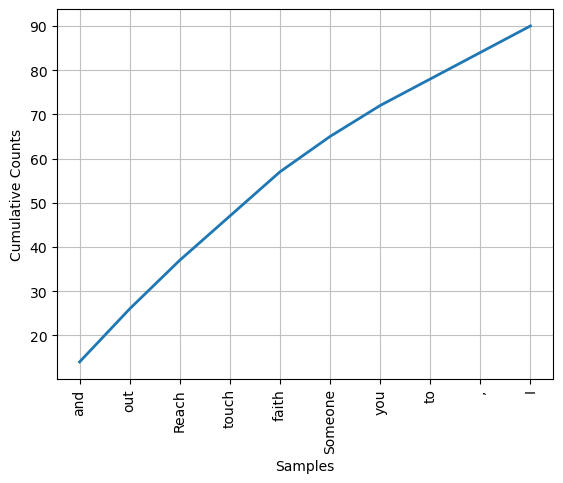

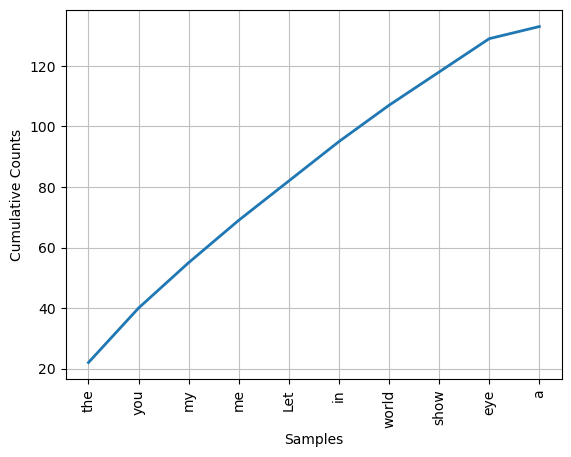

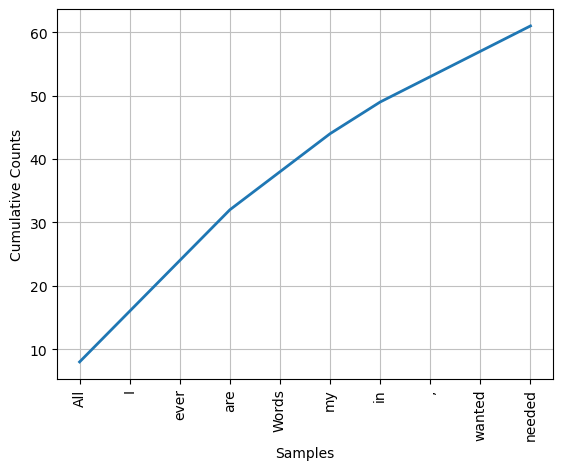

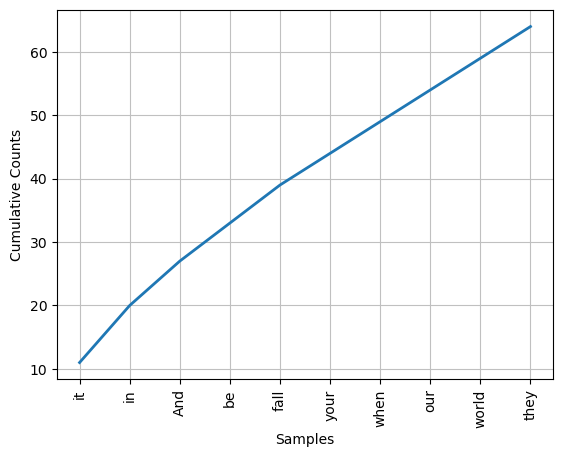

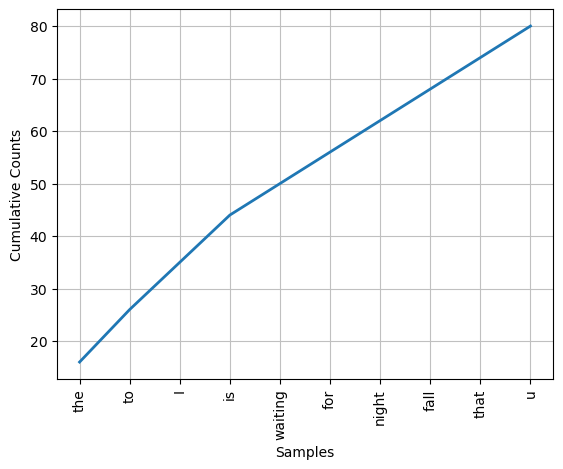

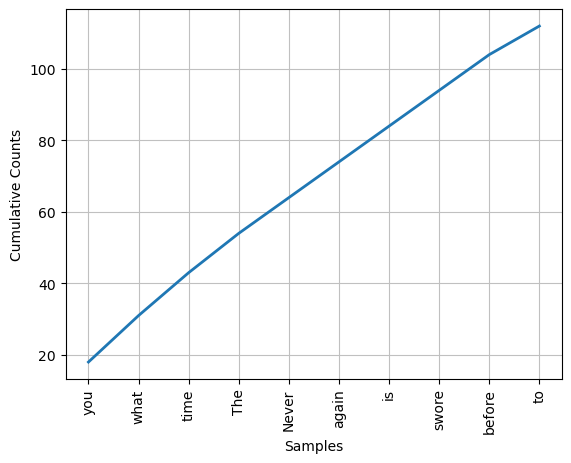

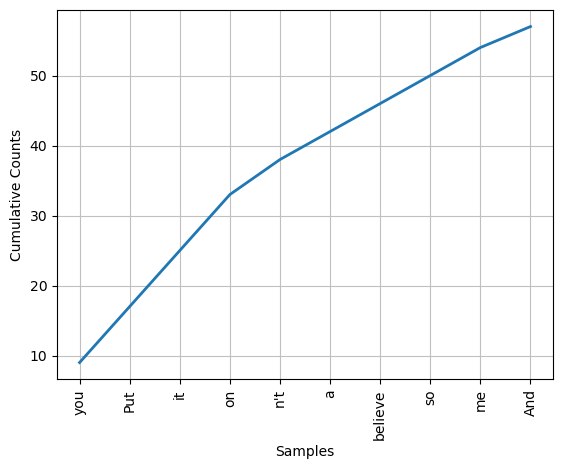

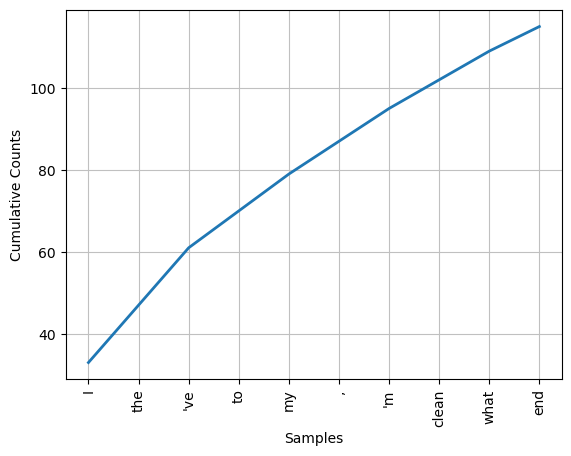

,Artist,Songs,Lyrics,tok_by_word,no_stopwords,lemmatized_words,frequency
0,Depeche Mode,Personal Jesus,\n\r\nReach out and touch faith\n\nYour own pe...,"[Reach, out, and, touch, faith, Your, own, per...","(Personal Jesus, [Reach, touch, faith, persona...","(Personal Jesus, [Reach, out, and, touch, fait...","(Personal Jesus, [(and, 14), (out, 12), (Reach..."
1,Depeche Mode,World In My Eyes,\n\r\nLet me take you on a trip\nAround the wo...,"[Let, me, take, you, on, a, trip, Around, the,...","(World In My Eyes, [Let, take, trip, Around, w...","(World In My Eyes, [Let, me, take, you, on, a,...","(World In My Eyes, [(the, 22), (you, 18), (my,..."
2,Depeche Mode,Enjoy The Silence,\n\r\nWords like violence break the silence\nC...,"[Words, like, violence, break, the, silence, C...","(Enjoy The Silence, [Words, like, violence, br...","(Enjoy The Silence, [Words, like, violence, br...","(Enjoy The Silence, [(All, 8), (I, 8), (ever, ..."
3,Depeche Mode,Halo,\n\r\nYou wear guilt\nLike shackles on your fe...,"[You, wear, guilt, Like, shackles, on, your, f...","(Halo, [wear, guilt, Like, shackles, feet, Lik...","(Halo, [You, wear, guilt, Like, shackle, on, y...","(Halo, [(it, 11), (in, 9), (And, 7), (be, 6), ..."
4,Depeche Mode,Waiting For The Night,\n\r\nI'm waiting for the night to fall\nI kno...,"[I, 'm, waiting, for, the, night, to, fall, I,...","(Waiting For The Night, ['m, waiting, night, f...","(Waiting For The Night, [I, 'm, waiting, for, ...","(Waiting For The Night, [(the, 16), (to, 10), ..."
5,Depeche Mode,Policy Of Truth,\n\r\nYou had something to hide\nShould have h...,"[You, had, something, to, hide, Should, have, ...","(Policy Of Truth, [something, hide, hidden, ,,...","(Policy Of Truth, [You, had, something, to, hi...","(Policy Of Truth, [(you, 18), (what, 13), (tim..."
6,Depeche Mode,Blue Dress,\n\r\nPut it on\nAnd don't say a word\nPut it ...,"[Put, it, on, And, do, n't, say, a, word, Put,...","(Blue Dress, [Put, n't, say, word, Put, one, p...","(Blue Dress, [Put, it, on, And, do, n't, say, ...","(Blue Dress, [(you, 9), (Put, 8), (it, 8), (on..."
7,Depeche Mode,Clean,"\n\r\nClean, the cleanest I've been\nAn end to...","[Clean, ,, the, cleanest, I, 've, been, An, en...","(Clean, [Clean, ,, cleanest, 've, end, tears, ...","(Clean, [Clean, ,, the, cleanest, I, 've, been...","(Clean, [(I, 33), (the, 14), ('ve, 14), (to, 9..."


In [22]:
from nltk import FreqDist

top_frequency = {song:[] for song in dm_df['Songs']}

for i in range(n):
    text = nltk.Text(dm_df['lemmatized_words'][i][1])
    frequency = FreqDist(text)
    frequency.plot(10,cumulative=True)
    top_frequency [dm_df['Songs'][i]] = frequency.most_common(10)

dm_df['frequency'] = top_frequency.items()
dm_df    

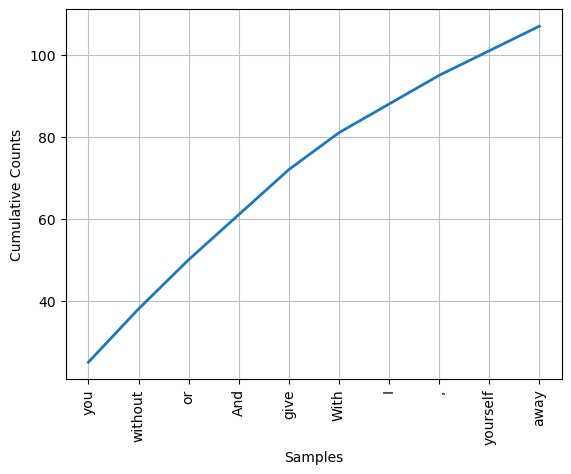

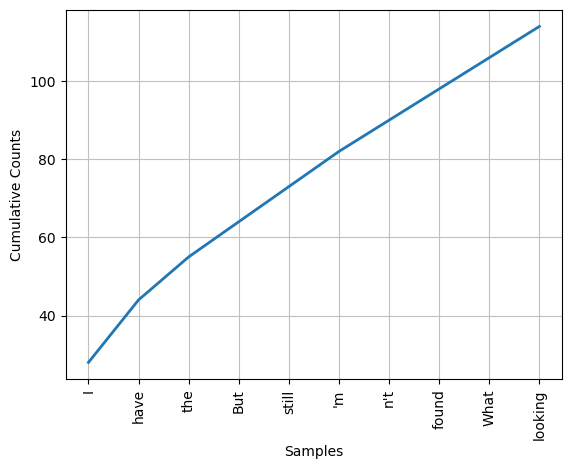

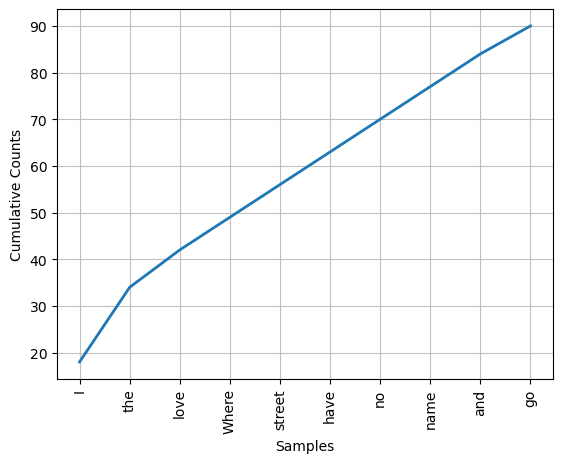

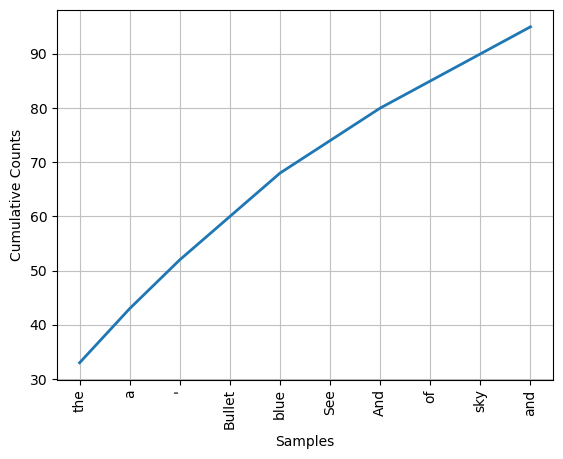

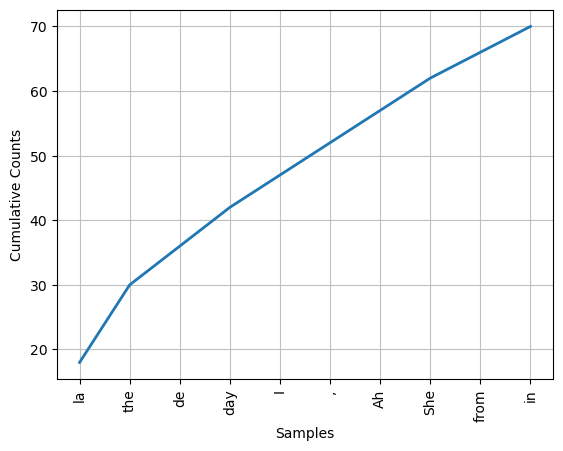

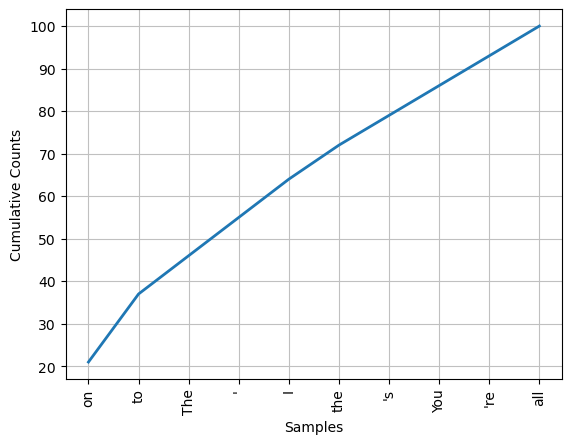

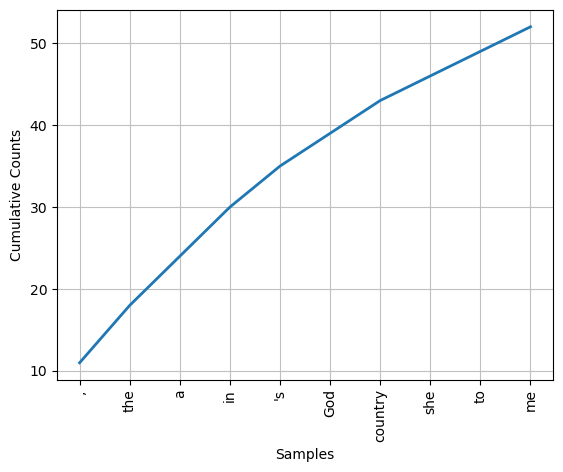

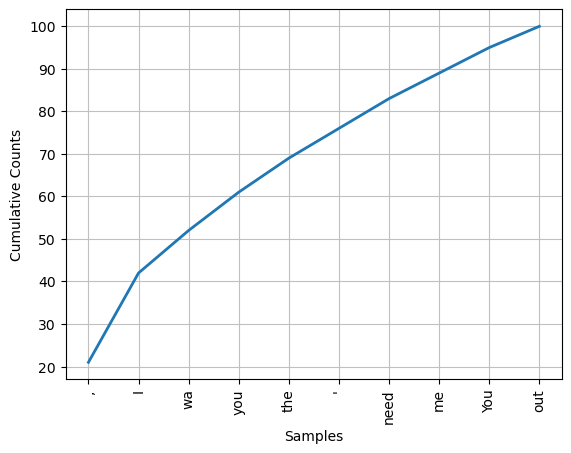

,Artist,Songs,Lyrics,tok_by_word,no_stopwords,lemmatized_words,frequency
0,U2,With Or Without You,\n\r\nSee the stone set in your eyes\nSee the ...,"[See, the, stone, set, in, your, eyes, See, th...","(With Or Without You, [See, stone, set, eyes, ...","(With Or Without You, [See, the, stone, set, i...","(With Or Without You, [(you, 25), (without, 13..."
1,U2,I Still Haven't Found What I'm Looking For,\n\r\nI have climbed the highest mountains\nI ...,"[I, have, climbed, the, highest, mountains, I,...","(I Still Haven't Found What I'm Looking For, [...","(I Still Haven't Found What I'm Looking For, [...","(I Still Haven't Found What I'm Looking For, [..."
2,U2,Where The Streets Have No Name,"\n\r\nI wanna run, I want to hide\nI wanna tea...","[I, wan, na, run, ,, I, want, to, hide, I, wan...","(Where The Streets Have No Name, [wan, na, run...","(Where The Streets Have No Name, [I, wan, na, ...","(Where The Streets Have No Name, [(I, 18), (th..."
3,U2,Bullet The Blue Sky,\n\r\nIn the howlin' wind\nComes a stingin' ra...,"[In, the, howlin, ', wind, Comes, a, stingin, ...","(Bullet The Blue Sky, [howlin, ', wind, Comes,...","(Bullet The Blue Sky, [In, the, howlin, ', win...","(Bullet The Blue Sky, [(the, 33), (a, 10), (',..."
4,U2,Running To Stand Still,\n\r\nAnd so she woke up\nWoke up from where s...,"[And, so, she, woke, up, Woke, up, from, where...","(Running To Stand Still, [woke, Woke, lyin, ',...","(Running To Stand Still, [And, so, she, woke, ...","(Running To Stand Still, [(la, 18), (the, 12),..."
5,U2,Red Hill Mining Town,\n\r\nFrom father to son\nThe blood runs thin\...,"[From, father, to, son, The, blood, runs, thin...","(Red Hill Mining Town, [father, son, blood, ru...","(Red Hill Mining Town, [From, father, to, son,...","(Red Hill Mining Town, [(on, 21), (to, 16), (T..."
6,U2,In God's Country,"\n\r\nDesert sky, dream beneath the desert sky...","[Desert, sky, ,, dream, beneath, the, desert, ...","(In God's Country, [Desert, sky, ,, dream, ben...","(In God's Country, [Desert, sky, ,, dream, ben...","(In God's Country, [(,, 11), (the, 7), (a, 6),..."
7,U2,Trip Through Your Wires,"\n\r\nIn the distance, she saw me comin' round...","[In, the, distance, ,, she, saw, me, comin, ',...","(Trip Through Your Wires, [distance, ,, saw, c...","(Trip Through Your Wires, [In, the, distance, ...","(Trip Through Your Wires, [(,, 21), (I, 21), (..."


In [7]:
from nltk import FreqDist

top_frequency = {song:[] for song in u2_df['Songs']}

for i in range(n):
    text = nltk.Text(u2_df['lemmatized_words'][i][1])
    frequency = FreqDist(text)
    frequency.plot(10,cumulative=True)
    top_frequency [u2_df['Songs'][i]] = frequency.most_common(10)

u2_df['frequency'] = top_frequency.items()
u2_df 

#### The graphs reveal that in the body of the songs, there are certain structure that are repeated constantly throughout the song; these structures happen to be the titles of the songs as well. Taking this into consideration, both bands are quite similar in the way they wrote the lyrics of some of the most well known songs of all time. 

#### You can use a dispersion plot to see how much a particular word appears and where it appears.

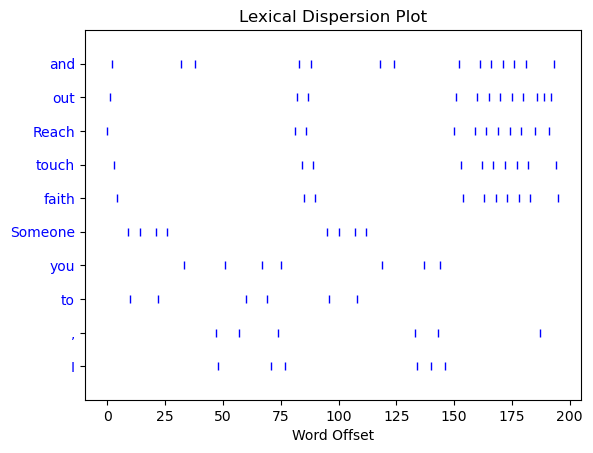

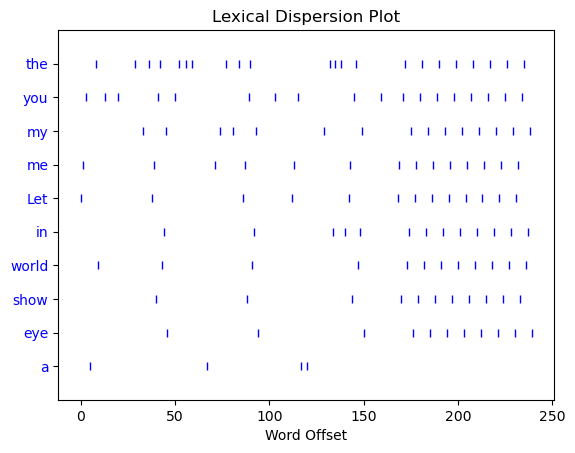

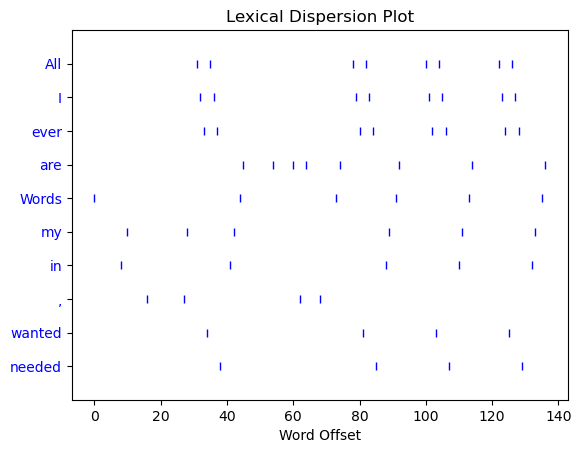

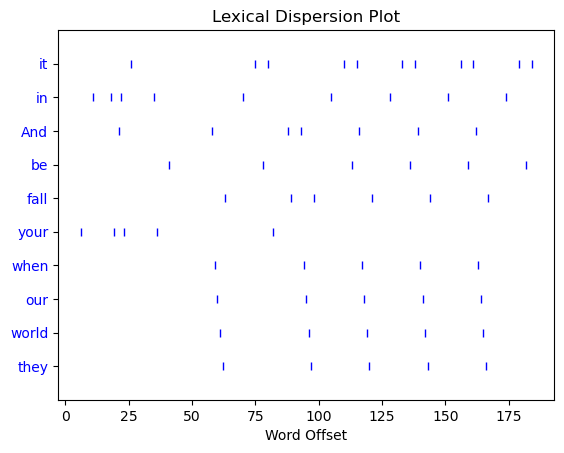

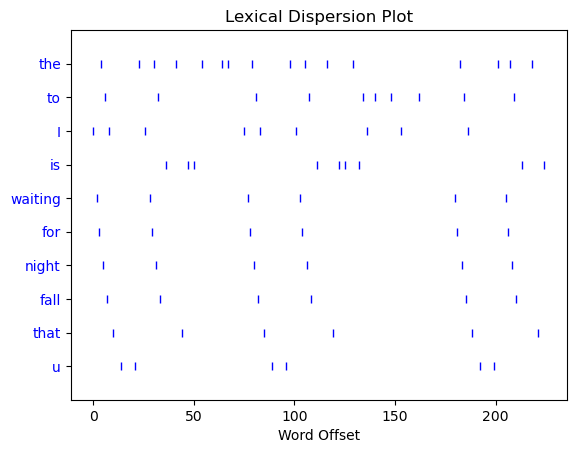

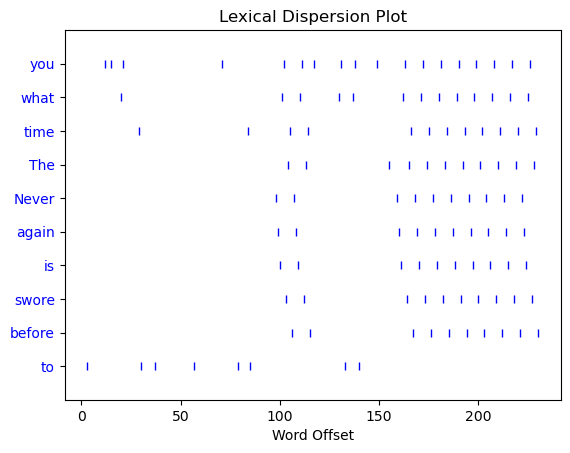

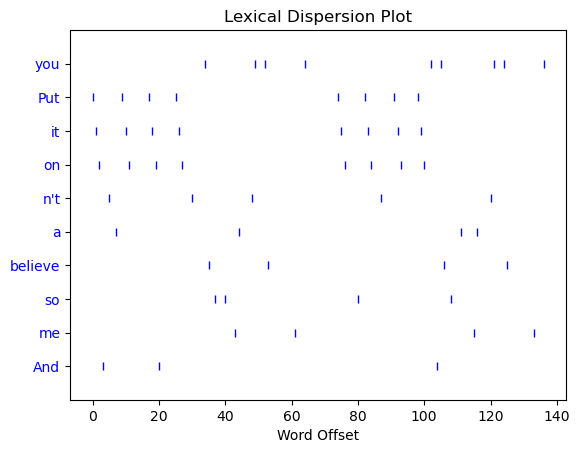

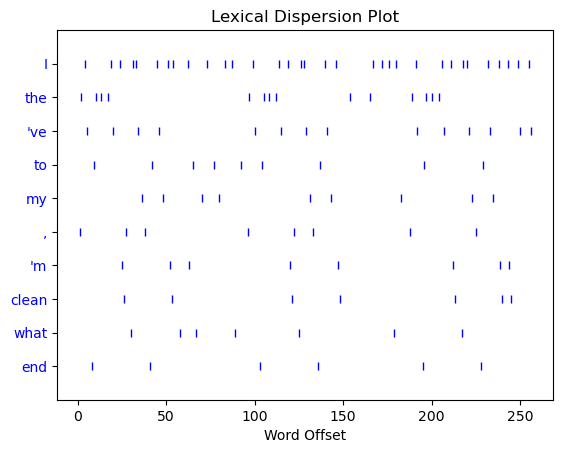

In [23]:
for i in range(n):
    text = nltk.Text(dm_df['lemmatized_words'][i][1])
    wordlist = [tup[0] for tup in dm_df['frequency'][i][1]]
    text.dispersion_plot(wordlist)

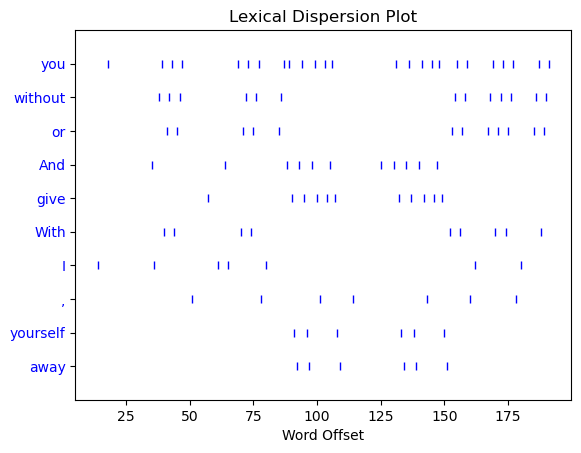

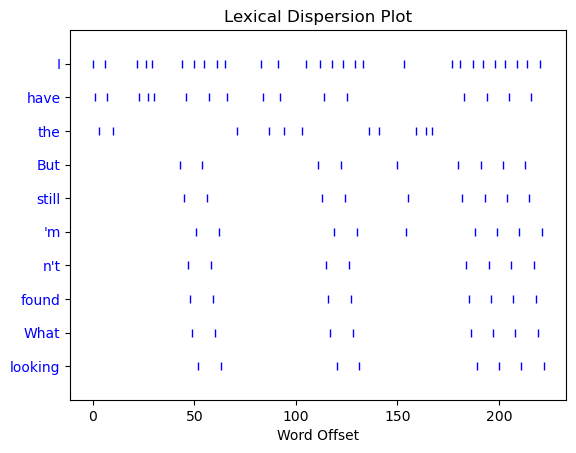

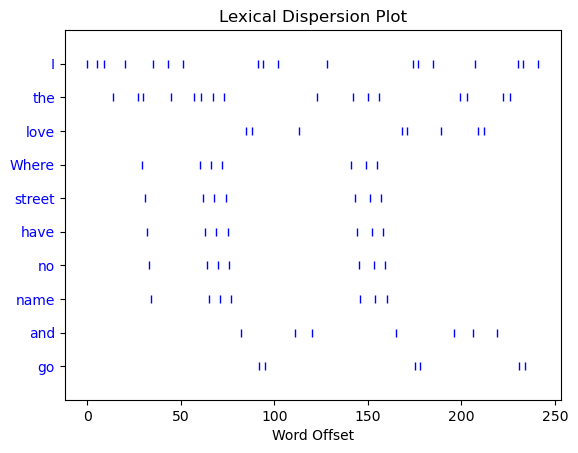

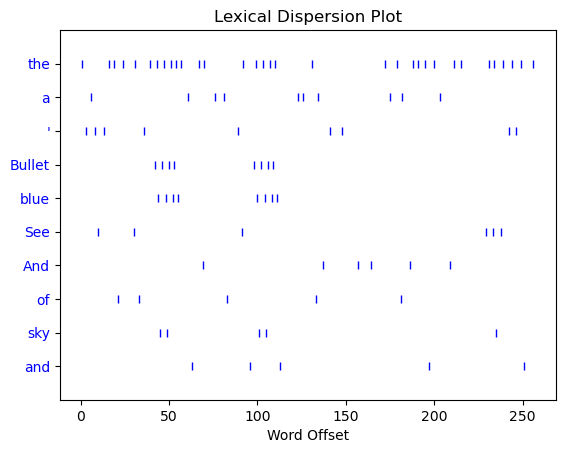

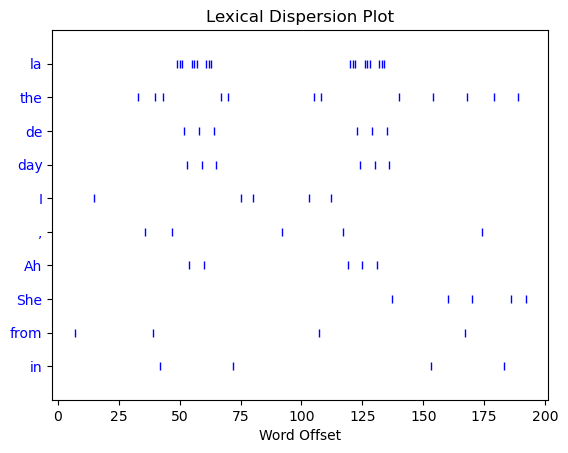

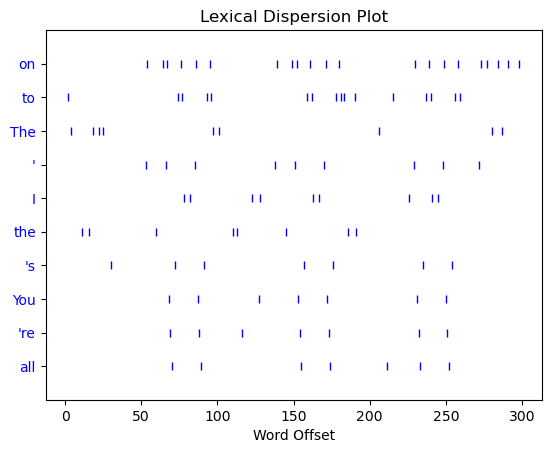

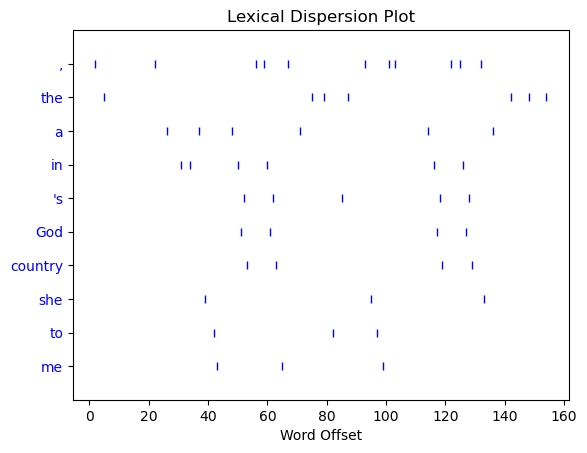

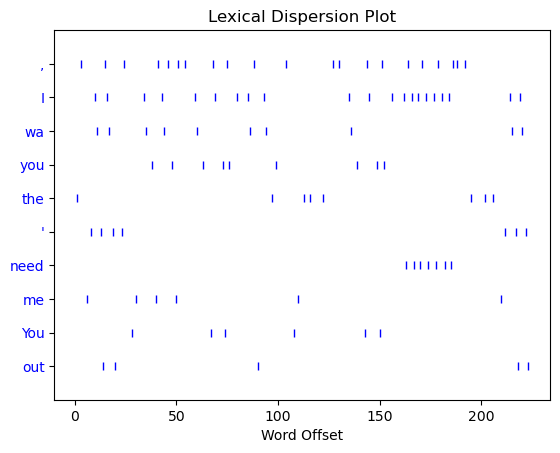

In [8]:
for i in range(n):
    text = nltk.Text(u2_df['lemmatized_words'][i][1])
    wordlist = [tup[0] for tup in u2_df['frequency'][i][1]]
    text.dispersion_plot(wordlist)

#### Each vertical blue line represents one instance of a word. So again, the plot shows that with both bands there is a very clear pattern in the very methodical construction of the songs. 